References for this code is from https://towardsdatascience.com/religion-on-twitter-5f7b84062304

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA as sklearnPCA
import seaborn

In [2]:
import spacy
import re
from pprint import pprint
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/austingerner/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Sentiment Analysis (VADER) - Overall Distribution

In [3]:
tweets_topic_distribution_df = pd.read_pickle("/Users/austingerner/Documents/gw/capstone/modeling/lda/data/tweet_topic_distribution_location.pkl")


In [4]:
tweets_topic_distribution_df.head()

,city,country,county,created_at,id,lang,latitude,longitude,no_stop_joined,state,...,tidy_tweet_tokens,tokens_no_stop,hashtags,stemmed,new_tweets_corpus,created_at_month,topic_id,max_count,total_docs,prevalence
0,Norwalk,United States,Fairfield County,Tue Apr 21 12:11:01 +0000 2020,1252570534250008577,en,41.113660,-73.407654,gasb proposal postpones almost statement imple...,Connecticut,...,"[gasb, proposal, postpones, almost, statement,...","[gasb, proposal, postpones, almost, statement,...",gasb,"[gasb, proposal, postpones, almost, statement,...","[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1...",4,33,10411,659690,0.015782
1,New York,United States,New York County,Tue Sep 08 19:25:02 +0000 2020,1303414058255675392,en,40.773041,-73.957489,lead global procurement supply covid vaccines ...,New York,...,"[will, lead, global, procurement, supply, covi...","[lead, global, procurement, supply, covid, vac...",covid19,"[lead, global, procurement, supply, covid, vac...","[(11, 1), (12, 1), (13, 1), (14, 1), (15, 1), ...",9,11,2658,258305,0.010290
3,Atlanta,United States,Fulton County,Thu Apr 09 10:00:00 +0000 2020,1248188906148892673,en,33.747421,-84.412048,looking important information ease capacity co...,Georgia,...,"[looking, important, information, ease, capaci...","[looking, important, information, ease, capaci...",,"[looking, important, information, ease, capaci...","[(20, 1), (21, 1), (22, 1), (23, 1), (24, 1), ...",4,65,12873,659690,0.019514
4,Manteca,United States,San Joaquin County,Sun Jul 12 03:07:22 +0000 2020,1282149524442472448,en,37.799170,-121.232189,quarantine watch shows normally watch closeeno...,California,...,"[quarantine, having, watch, shows, normally, w...","[quarantine, watch, shows, normally, watch, cl...",quarantine,"[quarantine, watch, shows, normally, watch, cl...","[(30, 1), (31, 1), (32, 1), (33, 1), (34, 1), ...",7,0,2760,271100,0.010181
9,New York,United States,New York County,Tue Sep 22 13:36:22 +0000 2020,1308399742993473538,en,40.773041,-73.957489,fauci direct listen experts politicians might ...,New York,...,"[from, fauci, direct, listen, experts, politic...","[fauci, direct, listen, experts, politicians, ...",,"[fauci, direct, listen, experts, politicians, ...","[(36, 1), (37, 1), (38, 1), (39, 1), (40, 1), ...",9,60,3860,258305,0.014944


In [5]:
tweets_topic_distribution_sentiment_df = tweets_topic_distribution_df[['id', 'tidy_tweet', 'tokens_no_stop', 'topic_id']].copy()




In [6]:
tweets_topic_distribution_sentiment_df.shape

(2850903, 4)

In [7]:
vader_analyzer = SentimentIntensityAnalyzer()
negative = []
neutral = []
positive = []
compound = []
def sentiment_scores(df, negative, neutral, positive, compound):
    for i in df['tidy_tweet']:
        sentiment_dict = vader_analyzer.polarity_scores(i)
        negative.append(sentiment_dict['neg'])
        neutral.append(sentiment_dict['neu'])
        positive.append(sentiment_dict['pos'])
        compound.append(sentiment_dict['compound'])
# Function calling 
sentiment_scores(tweets_topic_distribution_sentiment_df, negative, neutral, positive, compound)
# Prepare columns to add the scores later
tweets_topic_distribution_sentiment_df["negative"] = negative
tweets_topic_distribution_sentiment_df["neutral"] = neutral
tweets_topic_distribution_sentiment_df["positive"] = positive
tweets_topic_distribution_sentiment_df["compound"] = compound
# Fill the overall sentiment with encoding:
# (-1)Negative, (0)Neutral, (1)Positive
sentiment = []
for i in tweets_topic_distribution_sentiment_df['compound']:
    if i >= 0.05 : 
        sentiment.append(1)
  
    elif i <= - 0.05 : 
        sentiment.append(-1) 
        
    else : 
        sentiment.append(0)
tweets_topic_distribution_sentiment_df['sentiment'] = sentiment

In [31]:
tweets_topic_distribution_sentiment_df.head(50)

,id,tidy_tweet,tokens_no_stop,topic_75,negative,neutral,positive,compound,sentiment
0,1259985620681850881,here another like #tits #cock #cumtribute #nud...,"[another, like, tits, cock, cumtribute, nude, ...",6,0.000,0.839,0.161,0.3612,1
1,1260768292265852928,when going start mass deportation your essenti...,"[going, start, mass, deportation, essential, w...",45,0.229,0.573,0.197,-0.1280,-1
2,1259548147971391489,devilish illness #covid bounder #borisjohnson,"[devilish, illness, covid, bounder, borisjohnson]",58,0.659,0.341,0.000,-0.7003,-1
3,1260119310913200129,with record more deaths reported #covid death ...,"[record, deaths, reported, covid, death, toll,...",69,0.262,0.738,0.000,-0.5994,-1
4,1267237537090854914,latest books data profit daily thanks #covid #...,"[latest, books, data, profit, daily, thanks, c...",57,0.000,0.508,0.492,0.7003,1
5,1260629898210803712,only #redwave happening counting dead american...,"[redwave, happening, counting, dead, americans...",36,0.559,0.441,0.000,-0.8225,-1
6,1258533154257686528,girl about different ways rolling that each me...,"[girl, different, ways, rolling, means, someth...",6,0.000,1.000,0.000,0.0000,0
7,1257602651228905473,possible second wave coronavirus tune savannah...,"[possible, second, wave, coronavirus, tune, sa...",32,0.000,1.000,0.000,0.0000,0
8,1260110181410758657,bhubaneswar municipal corporation #bmc seals b...,"[bhubaneswar, municipal, corporation, bmc, sea...",17,0.242,0.758,0.000,-0.4939,-1
9,1259002047497527297,convolutional neural network diagnose covid fr...,"[convolutional, neural, network, diagnose, cov...",62,0.000,1.000,0.000,0.0000,0


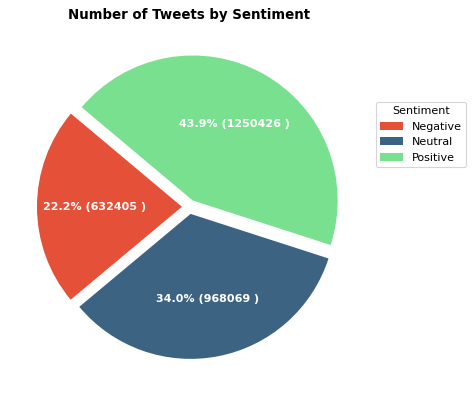

In [8]:

# Draw Plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"), dpi= 80)

data = [tweets_topic_distribution_sentiment_df.sentiment.value_counts()[-1], tweets_topic_distribution_sentiment_df.sentiment.value_counts()[0], tweets_topic_distribution_sentiment_df.sentiment.value_counts()[1]]
categories = ['Negative', 'Neutral', 'Positive']
explode = [0.05,0.05,0.05]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=['#e55039', '#3c6382', '#78e08f'],
                                  startangle=140,
                                  explode=explode)

# Decoration
ax.legend(wedges, categories, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0.2, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Number of Tweets by Sentiment", fontsize=12, fontweight="bold")
plt.show()

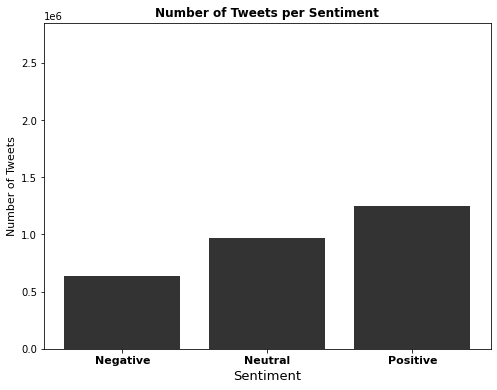

In [9]:

labels = ['Negative', 'Neutral', 'Positive']
freq = [tweets_topic_distribution_sentiment_df.sentiment.value_counts()[-1], tweets_topic_distribution_sentiment_df.sentiment.value_counts()[0], tweets_topic_distribution_sentiment_df.sentiment.value_counts()[1]]
index = np.arange(len(freq))

plt.figure(figsize=(8,6))
plt.bar(index, freq, alpha=0.8, color= 'black')
plt.xlabel('Sentiment', fontsize=13)
plt.ylabel('Number of Tweets', fontsize=11)
plt.xticks(index, labels, fontsize=11, fontweight="bold") 
plt.title('Number of Tweets per Sentiment', fontsize=12, fontweight="bold")
plt.ylim(0, len(tweets_topic_distribution_sentiment_df['tidy_tweet']))
plt.show()

In [10]:
data = tweets_topic_distribution_sentiment_df[(tweets_topic_distribution_sentiment_df["sentiment"]!=0)]


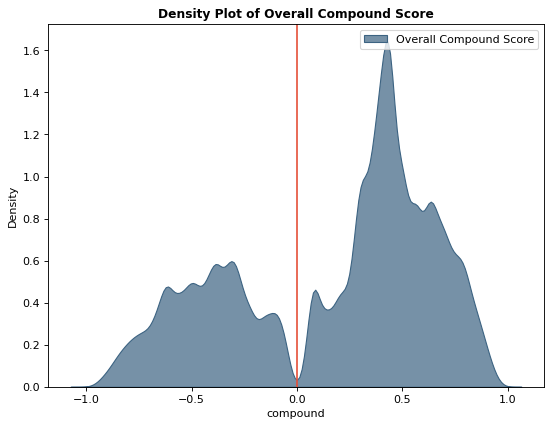

In [11]:
plt.figure(figsize=(8,6), dpi= 80)
seaborn.kdeplot(data["compound"], shade=True, color="#3c6382", label="Overall Compound Score", alpha=.7)

# Decoration
plt.title('Density Plot of Overall Compound Score', fontsize=11, fontweight='bold')
plt.axvline(x=0, color='#e55039')
plt.legend()
plt.show()

In [12]:
def lemmatization(tweets, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    tweets_out = []
    for sent in tweets:
        doc = nlp(" ".join(sent)) 
        tweets_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return tweets_out

In [13]:
nlp = spacy.load('en', disable=['parser', 'ner'])

In [14]:
tweets_topic_distribution_sentiment_df['lemmatized'] = lemmatization(tweets_topic_distribution_sentiment_df['tokens_no_stop'], allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])


In [15]:

df_pos = tweets_topic_distribution_sentiment_df[tweets_topic_distribution_sentiment_df['sentiment']==1]
df_neg = tweets_topic_distribution_sentiment_df[tweets_topic_distribution_sentiment_df['sentiment']==(-1)]

In [16]:
# Join the tweet back together
def rejoin_words(row):
    words = row['lemmatized']
    joined_words = (" ".join(words))
    return joined_words

In [17]:
all_words_pos = ' '.join([text for text in df_pos.apply(rejoin_words, axis=1)])
all_words_neg = ' '.join([text for text in df_neg.apply(rejoin_words, axis=1)])

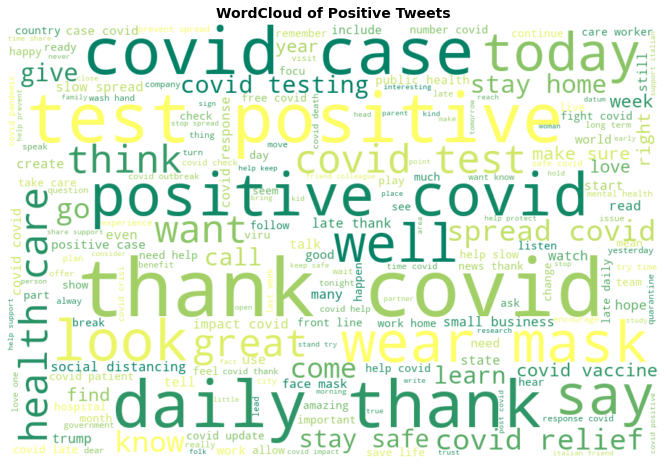

In [18]:
wordcloud = WordCloud(width=900, height=600, random_state=21, max_font_size=110, background_color='white', 
                      max_words=200,colormap='summer').generate(all_words_pos)

plt.figure(figsize=(12, 8))
plt.title('WordCloud of Positive Tweets', fontsize=14, fontweight="bold")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


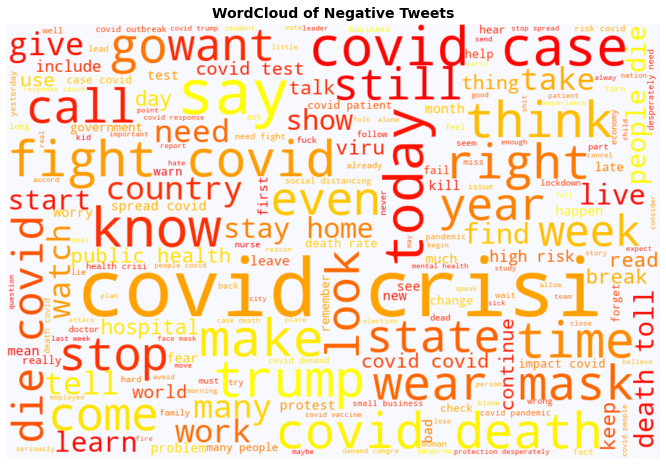

In [19]:
wordcloud = WordCloud(width=900, height=600, random_state=21, max_font_size=110, background_color='ghostwhite', 
                      max_words=200,colormap='autumn').generate(all_words_neg)

plt.figure(figsize=(12, 8))
plt.title('WordCloud of Negative Tweets', fontsize=14, fontweight="bold")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


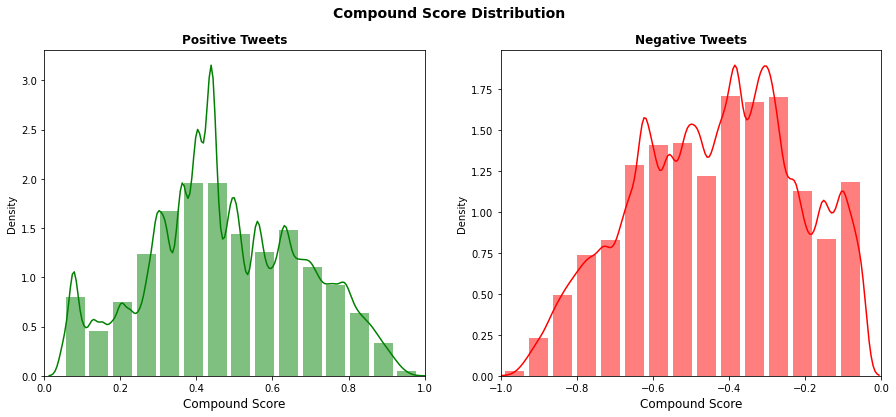

In [20]:
x1 = df_pos['compound']
x2 = df_neg['compound']
plt.figure(figsize=(15,6))
plt.suptitle('Compound Score Distribution', fontsize=14, fontweight="bold")
plt.subplot(1,2,1)

seaborn.distplot(x1, color="g", bins=15, hist_kws={"alpha": 0.5,"rwidth":0.8})
plt.title('Positive Tweets',fontsize=12, fontweight="bold")
plt.xlabel("Compound Score", fontsize=12)
plt.xlim([0,1])

# Chart 2: Derivative Function
plt.subplot(1,2,2)
seaborn.distplot(x2, color="r", bins=15, hist_kws={"alpha": 0.5, "rwidth":0.8})
plt.title("Negative Tweets",fontsize=12, fontweight="bold")
plt.xlabel("Compound Score", fontsize=12)
plt.xlim([-1,0])

plt.show()

In [21]:
x1.describe()


count    1.250427e+06
mean     4.751256e-01
std      2.033448e-01
min      5.000000e-02
25%      3.400000e-01
50%      4.404000e-01
75%      6.249000e-01
max      9.844000e-01
Name: compound, dtype: float64

In [22]:
x2.describe()


count    632406.000000
mean         -0.434587
std           0.212930
min          -0.994300
25%          -0.599400
50%          -0.421500
75%          -0.273200
max          -0.050000
Name: compound, dtype: float64

In [50]:
# data_to_plot = [x1,(x2)*-1]
# # Box-plot
# fig = plt.figure(1, figsize=(8, 6))
# ax = fig.add_subplot(111)
# bp = ax.boxplot(data_to_plot, patch_artist=True)
# for box in bp['boxes']:
#     change outline color
#     box.set( color='#b2bec3', linewidth=2)
# ## change color and linewidth of the whiskers
# for whisker in bp['whiskers']:
#     whisker.set(color='#7570b3', linewidth=2)
# for median in bp['medians']:
#     median.set(color='#e17055', linewidth=3)
# plt.boxplot(data_to_plot)
# plt.title('Compound Score', fontsize=13, fontweight='bold')
# ax.set_xticklabels(['Positive', 'Negative (inverse sign)'], fontweight='bold')
# plt.show()

In [23]:
df_pos.sort_values('compound', inplace=True, ascending=False)
df_pos.reset_index(drop=True, inplace=True)

<ipython-input-23-3bfd5e3767e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos.sort_values('compound', inplace=True, ascending=False)


In [24]:
df_pos.head(10)


,id,tidy_tweet,tokens_no_stop,topic_id,negative,neutral,positive,compound,sentiment,lemmatized
0,1294643519055958026,great attitude becomes great mood great mood b...,"[great, attitude, becomes, great, mood, great,...",22,0.000,0.196,0.804,0.9844,1,"[great, attitude, become, great, mood, great, ..."
1,1242128870884532225,good news please good news please good news pl...,"[good, news, please, good, news, please, good,...",16,0.000,0.170,0.830,0.9836,1,"[good, good, news, good, news, good, news, goo..."
2,1254226984470601728,happy saturday loves celebrate weekend celebra...,"[happy, saturday, loves, celebrate, weekend, c...",69,0.000,0.161,0.839,0.9799,1,"[love, celebrate, weekend, life, encourage, ce..."
3,1273277601554075650,love acts justice love acts mercy love acts pr...,"[love, acts, justice, love, acts, mercy, love,...",68,0.059,0.147,0.794,0.9796,1,"[love, act, love, act, mercy, love, act, prote..."
4,1248069791707009024,friends like best type #ppe super talented sup...,"[friends, like, best, type, ppe, super, talent...",56,0.000,0.157,0.843,0.9794,1,"[friend, good, type, ppe, super, talented, sup..."
5,1245797236921040896,friends know tough during this time your best ...,"[friends, know, tough, time, best, super, supe...",56,0.043,0.201,0.756,0.9794,1,"[friend, know, tough, time, well, super, super..."
6,1248666724234334220,beautiful loving kind talented today would lov...,"[beautiful, loving, kind, talented, today, wou...",68,0.000,0.137,0.863,0.9779,1,"[beautiful, loving, kind, talente, today, woul..."
7,1285530990404947968,please share repost more days miracle miracle ...,"[please, share, repost, days, miracle, miracle...",13,0.000,0.219,0.781,0.9774,1,"[share, day, miracle, miracle, miracle, nee, m..."
8,1289792112309854209,enjoyed lovely safely distanced picnic with de...,"[enjoyed, lovely, safely, distanced, picnic, d...",8,0.000,0.214,0.786,0.9769,1,"[safely, distance, dear, friend, tonite, good,..."
9,1274082937387057153,love peace love understanding love kindness lo...,"[love, peace, love, understanding, love, kindn...",68,0.000,0.147,0.853,0.9758,1,"[love, love, kindness, love, people, inside]"


In [25]:
# 10 Most Negative Tweets
df_neg.sort_values('compound', inplace=True)
df_neg.reset_index(drop=True).head(15)

<ipython-input-25-ede40f2716ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neg.sort_values('compound', inplace=True)


,id,tidy_tweet,tokens_no_stop,topic_id,negative,neutral,positive,compound,sentiment,lemmatized
0,1320353038918471680,lying lying lying lying lying lying lying lyin...,"[lying, lying, lying, lying, lying, lying, lyi...",7,0.981,0.019,0.000,-0.9943,-1,"[lie, lie, lie, lie, lie, lie, lie, lie, lie, ..."
1,1247284525283061760,everyday just lies lies lies lies lies lies li...,"[everyday, lies, lies, lies, lies, lies, lies,...",10,0.966,0.034,0.000,-0.9943,-1,"[lie, lie, lie, lie, lie, lie, lie, lie, lie, ..."
2,1240105069418360833,fuck fuck fuck fuck fuck fuck fuck fuck fuck f...,"[fuck, fuck, fuck, fuck, fuck, fuck, fuck, fuc...",7,1.000,0.000,0.000,-0.9918,-1,[fuck]
3,1275982709182119936,dead dead dead blue dead black dead white dead...,"[dead, dead, dead, blue, dead, black, dead, wh...",71,0.880,0.120,0.000,-0.9902,-1,"[dead, dead, dead, blue, dead, black, dead, wh..."
4,1320108289959616514,fear fear fear fear fear fear fear fear fear f...,"[fear, fear, fear, fear, fear, fear, fear, fea...",70,0.898,0.102,0.000,-0.9874,-1,"[fear, fear, fear, fear, fear, fear, fear, fea..."
5,1311315925229076482,worst debate worst economy worst foreign polic...,"[worst, debate, worst, economy, worst, foreign...",21,0.761,0.239,0.000,-0.9844,-1,"[bad, debate, bad, economy, worst, foreign, po..."
6,1284249456993611783,trump lies lies lies lies lies lies lies lies ...,"[trump, lies, lies, lies, lies, lies, lies, li...",10,0.971,0.029,0.000,-0.9843,-1,"[lie, lie, lie, lie, lie, lie, lie, lie, lie, ..."
7,1297300159706144768,death death death economy collapses death poli...,"[death, death, death, economy, collapses, deat...",15,0.808,0.192,0.000,-0.9842,-1,"[death, death, death, economy, collapse, death..."
8,1280546281635667971,fuck masks fuck communism fuck fuck cancel cul...,"[fuck, masks, fuck, communism, fuck, fuck, can...",7,0.833,0.167,0.000,-0.9834,-1,"[censorship, fuck, deep, state, fuck]"
9,1294879045595865088,magats classless evil immoral disgusting devil...,"[magats, classless, evil, immoral, disgusting,...",7,0.832,0.112,0.056,-0.9831,-1,"[classless, evil, immoral, disgusting, worship..."


In [26]:
df_neg.head(10)

,id,tidy_tweet,tokens_no_stop,topic_id,negative,neutral,positive,compound,sentiment,lemmatized
1328121,1320353038918471680,lying lying lying lying lying lying lying lyin...,"[lying, lying, lying, lying, lying, lying, lyi...",7,0.981,0.019,0.000,-0.9943,-1,"[lie, lie, lie, lie, lie, lie, lie, lie, lie, ..."
2483412,1247284525283061760,everyday just lies lies lies lies lies lies li...,"[everyday, lies, lies, lies, lies, lies, lies,...",10,0.966,0.034,0.000,-0.9943,-1,"[lie, lie, lie, lie, lie, lie, lie, lie, lie, ..."
4138494,1240105069418360833,fuck fuck fuck fuck fuck fuck fuck fuck fuck f...,"[fuck, fuck, fuck, fuck, fuck, fuck, fuck, fuc...",7,1.000,0.000,0.000,-0.9918,-1,[fuck]
2623984,1275982709182119936,dead dead dead blue dead black dead white dead...,"[dead, dead, dead, blue, dead, black, dead, wh...",71,0.880,0.120,0.000,-0.9902,-1,"[dead, dead, dead, blue, dead, black, dead, wh..."
12468,1320108289959616514,fear fear fear fear fear fear fear fear fear f...,"[fear, fear, fear, fear, fear, fear, fear, fea...",70,0.898,0.102,0.000,-0.9874,-1,"[fear, fear, fear, fear, fear, fear, fear, fea..."
298729,1311315925229076482,worst debate worst economy worst foreign polic...,"[worst, debate, worst, economy, worst, foreign...",21,0.761,0.239,0.000,-0.9844,-1,"[bad, debate, bad, economy, worst, foreign, po..."
248805,1284249456993611783,trump lies lies lies lies lies lies lies lies ...,"[trump, lies, lies, lies, lies, lies, lies, li...",10,0.971,0.029,0.000,-0.9843,-1,"[lie, lie, lie, lie, lie, lie, lie, lie, lie, ..."
276577,1297300159706144768,death death death economy collapses death poli...,"[death, death, death, economy, collapses, deat...",15,0.808,0.192,0.000,-0.9842,-1,"[death, death, death, economy, collapse, death..."
1105662,1280546281635667971,fuck masks fuck communism fuck fuck cancel cul...,"[fuck, masks, fuck, communism, fuck, fuck, can...",7,0.833,0.167,0.000,-0.9834,-1,"[censorship, fuck, deep, state, fuck]"
340105,1294879045595865088,magats classless evil immoral disgusting devil...,"[magats, classless, evil, immoral, disgusting,...",7,0.832,0.112,0.056,-0.9831,-1,"[classless, evil, immoral, disgusting, worship..."


In [27]:
tweets_topic_distribution_sentiment_df.to_pickle('data/sentiment_analysis_vader_results_capstone.pkl')


In [28]:
tweets_topic_distribution_sentiment_df.head()

,id,tidy_tweet,tokens_no_stop,topic_id,negative,neutral,positive,compound,sentiment,lemmatized
0,1252570534250008577,#gasb proposal postpones almost statement impl...,"[gasb, proposal, postpones, almost, statement,...",33,0.148,0.634,0.218,0.2500,1,"[proposal, postpone, almost, statement, implem..."
1,1303414058255675392,will lead global procurement supply #covid vac...,"[lead, global, procurement, supply, covid, vac...",11,0.000,1.000,0.000,0.0000,0,"[lead, global, procurement, supply, covid, vac..."
3,1248188906148892673,looking important information ease capacity co...,"[looking, important, information, ease, capaci...",65,0.000,0.677,0.323,0.5106,1,"[look, important, information, ease, capacity,..."
4,1282149524442472448,#quarantine having watch shows normally wouldn...,"[quarantine, watch, shows, normally, watch, cl...",0,0.000,1.000,0.000,0.0000,0,"[show, normally, watch, sip, streaming, covid]"
9,1308399742993473538,from fauci direct listen experts politicians m...,"[fauci, direct, listen, experts, politicians, ...",60,0.242,0.758,0.000,-0.4939,-1,"[direct, listen, expert, politician, may, surv..."
